## Import all the important packages

In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn, because of excellent heatmaps
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
# can also use sklearn for our regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

## Standardisation function

In [18]:
def standardise(data, mu=None, sigma=None):
    # return data, mu, sigma
    if mu is None:
        mu = np.mean(data, axis=0)
    if sigma is None:
        sigma = np.std(data, axis=0)
        
    scaled = (data - mu) / sigma
    return scaled, mu, sigma

def rmse(actual, pred):
  return np.sqrt(mean_squared_error(actual, pred))

def r_squared(actual, predicted):
  r2 = r2_score(actual, predicted)
  return r2

def adj_r2(actual, predicted, n, p):
  r2 = r2_score(actual, predicted)
  adjr2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
  return adjr2

def eval(model, x_train, y_train, x_val, y_val, x_test, y_test, plot_residual=True):

    print('\nRMSE train: %f val: %f test: %f; \nR^2 train: %f;' % \
                (rmse(y_train, model.predict(x_train)),\
                rmse(y_val , model.predict(x_val)),\
                rmse(y_test , model.predict(x_test)),\
                r_squared(y_train , model.predict(x_train))))


    fig = plt.figure(figsize=[30, 20])

    ax = fig.add_subplot(3, 1, 1)
    ax.plot(y_train, alpha=0.5, lw=3, label='Actual')
    ax.plot(model.predict(x_train), label='train')
    ax.set_title('Train data')
    ax.legend();

    ax = fig.add_subplot(3, 1, 2)
    ax.plot(y_val,alpha=0.5, lw=3, label='Actual')
    ax.plot(model.predict(x_val), label='val')
    ax.set_title('Val data')
    ax.legend();

    ax = fig.add_subplot(3, 1, 3)
    ax.plot(y_test, alpha=0.5, lw=3, label='Actual')
    ax.plot(model.predict(x_test), label='test')
    ax.set_title('Test data')
    ax.legend();

    if plot_residual:
      fig = plt.figure(figsize=[15, 10])
      ax = fig.add_subplot(1, 1, 1)
      ax.hist(model.predict(x_test) - y_test);
      ax.set_title('Residual histogram')



# Load Data

In [3]:
train_data = pd.read_csv('Data/Q1/communities_train.csv')
val_data = pd.read_csv('Data/Q1/communities_val.csv')
test_data = pd.read_csv('Data/Q1/communities_test.csv')

##  Data Discovery

In [4]:
print('Data shape:')
print(train_data.shape, val_data.shape, test_data.shape)
print('\nNumber of Values outside [0,1]?:')
temp = (train_data > 1).append(train_data < 0)\
        .append(val_data > 1).append(val_data < 0)\
        .append(test_data > 1).append(test_data < 0)
print(temp.sum().sum())

Data shape:
(298, 101) (298, 101) (299, 101)

Number of Values outside [0,1]?:
0


/tmp/ipykernel_36052/3179937085.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = (train_data > 1).append(train_data < 0)\
/tmp/ipykernel_36052/3179937085.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = (train_data > 1).append(train_data < 0)\
/tmp/ipykernel_36052/3179937085.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = (train_data > 1).append(train_data < 0)\
/tmp/ipykernel_36052/3179937085.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = (train_data > 1).append(train_data < 0)\


8.379983414866511e-17


/home/rodo/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


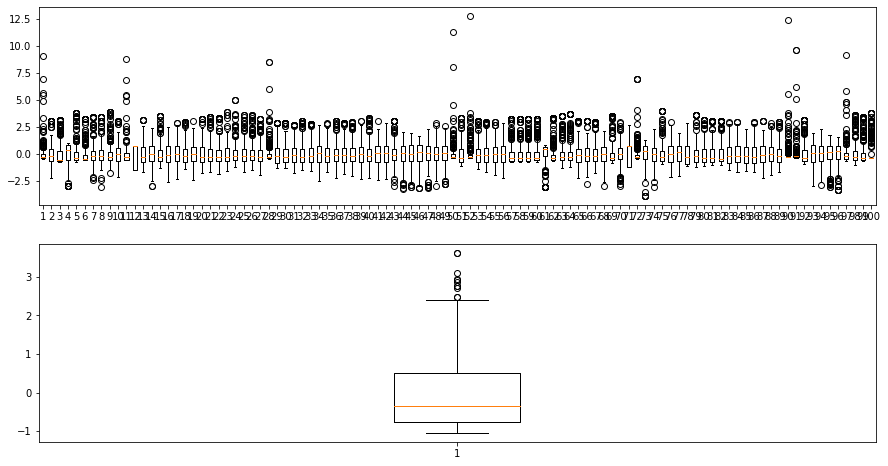

In [5]:
x_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1:]
x_val, y_val = val_data.iloc[:,:-1], val_data.iloc[:,-1:]
x_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1:]

x_train, mu, sigma = standardise(x_train)
x_val, _, _ = standardise(x_val, mu, sigma)
x_test, _, _ = standardise(x_test, mu, sigma)

y_train, mu, sigma = standardise(y_train)
y_val, _, _ = standardise(y_val, mu, sigma)
y_test, _, _ = standardise(y_test, mu, sigma)

# print( type(x_train.iloc[5,8]).__name__ )
print(np.mean(np.mean(x_train)))

fig = plt.figure(figsize=[15, 8])
ax = fig.add_subplot(2, 1, 1)
ax.boxplot(x_train);  
ax = fig.add_subplot(2, 1, 2)
ax.boxplot(y_train);
# ax = fig.add_subplot(3, 1, 2)
# ax.boxplot(x_val);
# ax = fig.add_subplot(3, 1, 3)
# ax.boxplot(x_test);

## Correlation heatmap

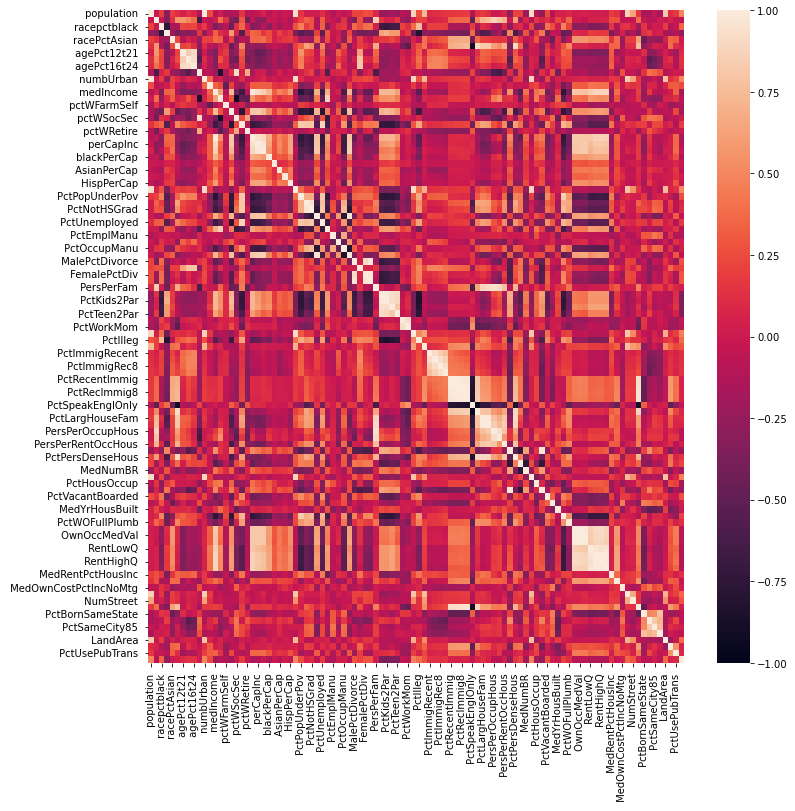

In [6]:
corr_coeffs = x_train.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr_coeffs, annot=False, fmt="1.3f", vmin=-1.0, vmax=1.0)

# Linear Regression
## Fitting the model and display result

                                  OLS Regression Results                                  
Dep. Variable:      ViolentCrimesPerPop    R-squared (uncentered):                   0.759
Model:                               OLS   Adj. R-squared (uncentered):              0.637
Method:                    Least Squares   F-statistic:                              6.239
Date:                   Wed, 20 Jul 2022   Prob (F-statistic):                    4.63e-28
Time:                           14:00:10   Log-Likelihood:                         -210.77
No. Observations:                    298   AIC:                                      621.5
Df Residuals:                        198   BIC:                                      991.2
Df Model:                            100                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

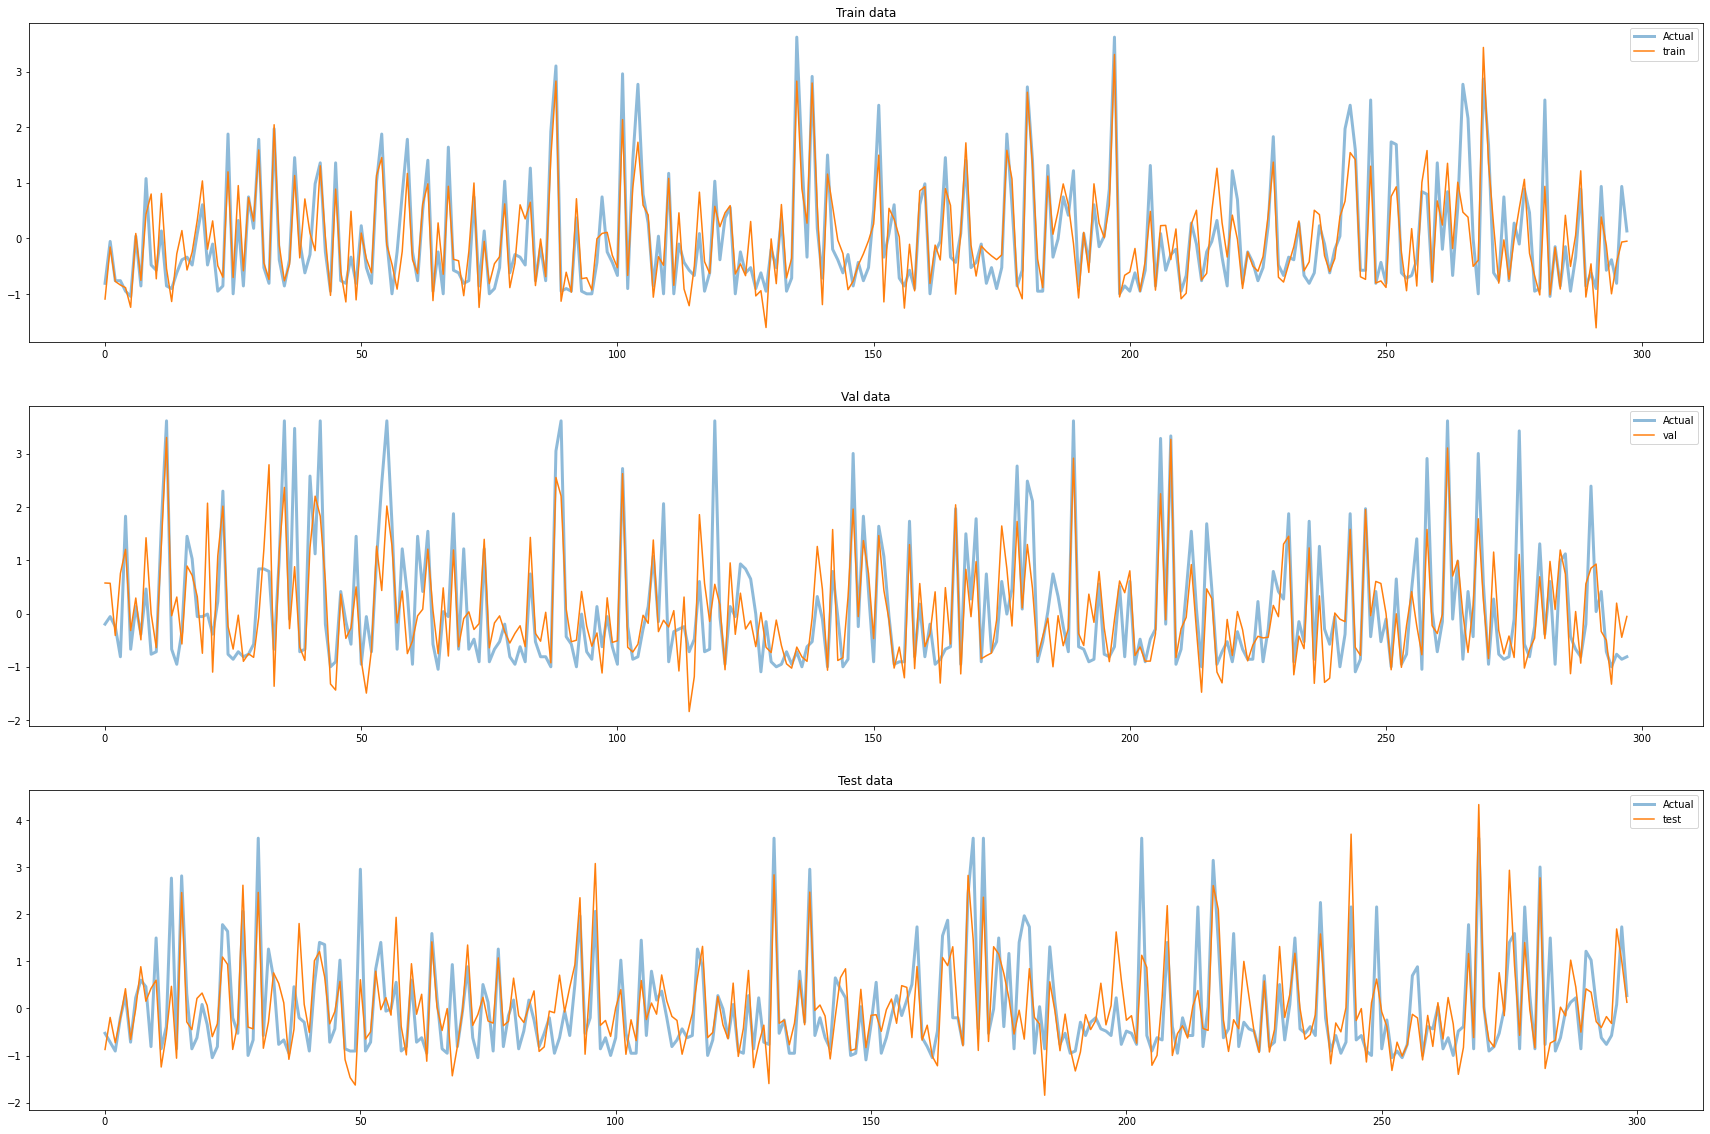

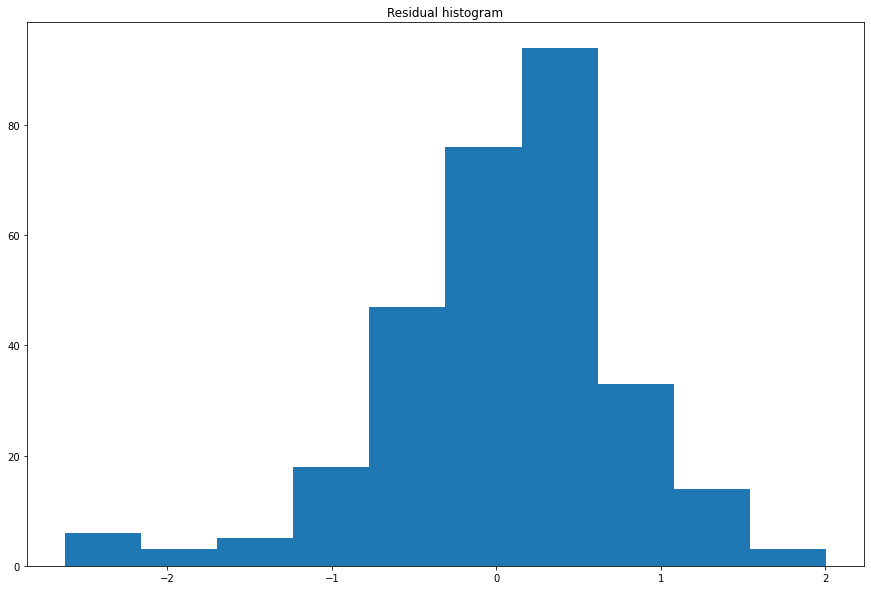

In [25]:
# sm.OLS: used to get Summary Info
linear_model = sm.OLS(y_train, x_train).fit()
print( linear_model.summary() )
print('Predictors with p-value > 0.05: ', np.sum(linear_model.pvalues > 0.05))

# linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
eval(linear_model, x_train, y_train, x_val, y_val, x_test, y_test)


## Drop some columns


RMSE train: 0.498772 val: 0.717321 test: 0.710969; 
R^2 train: 0.751226;


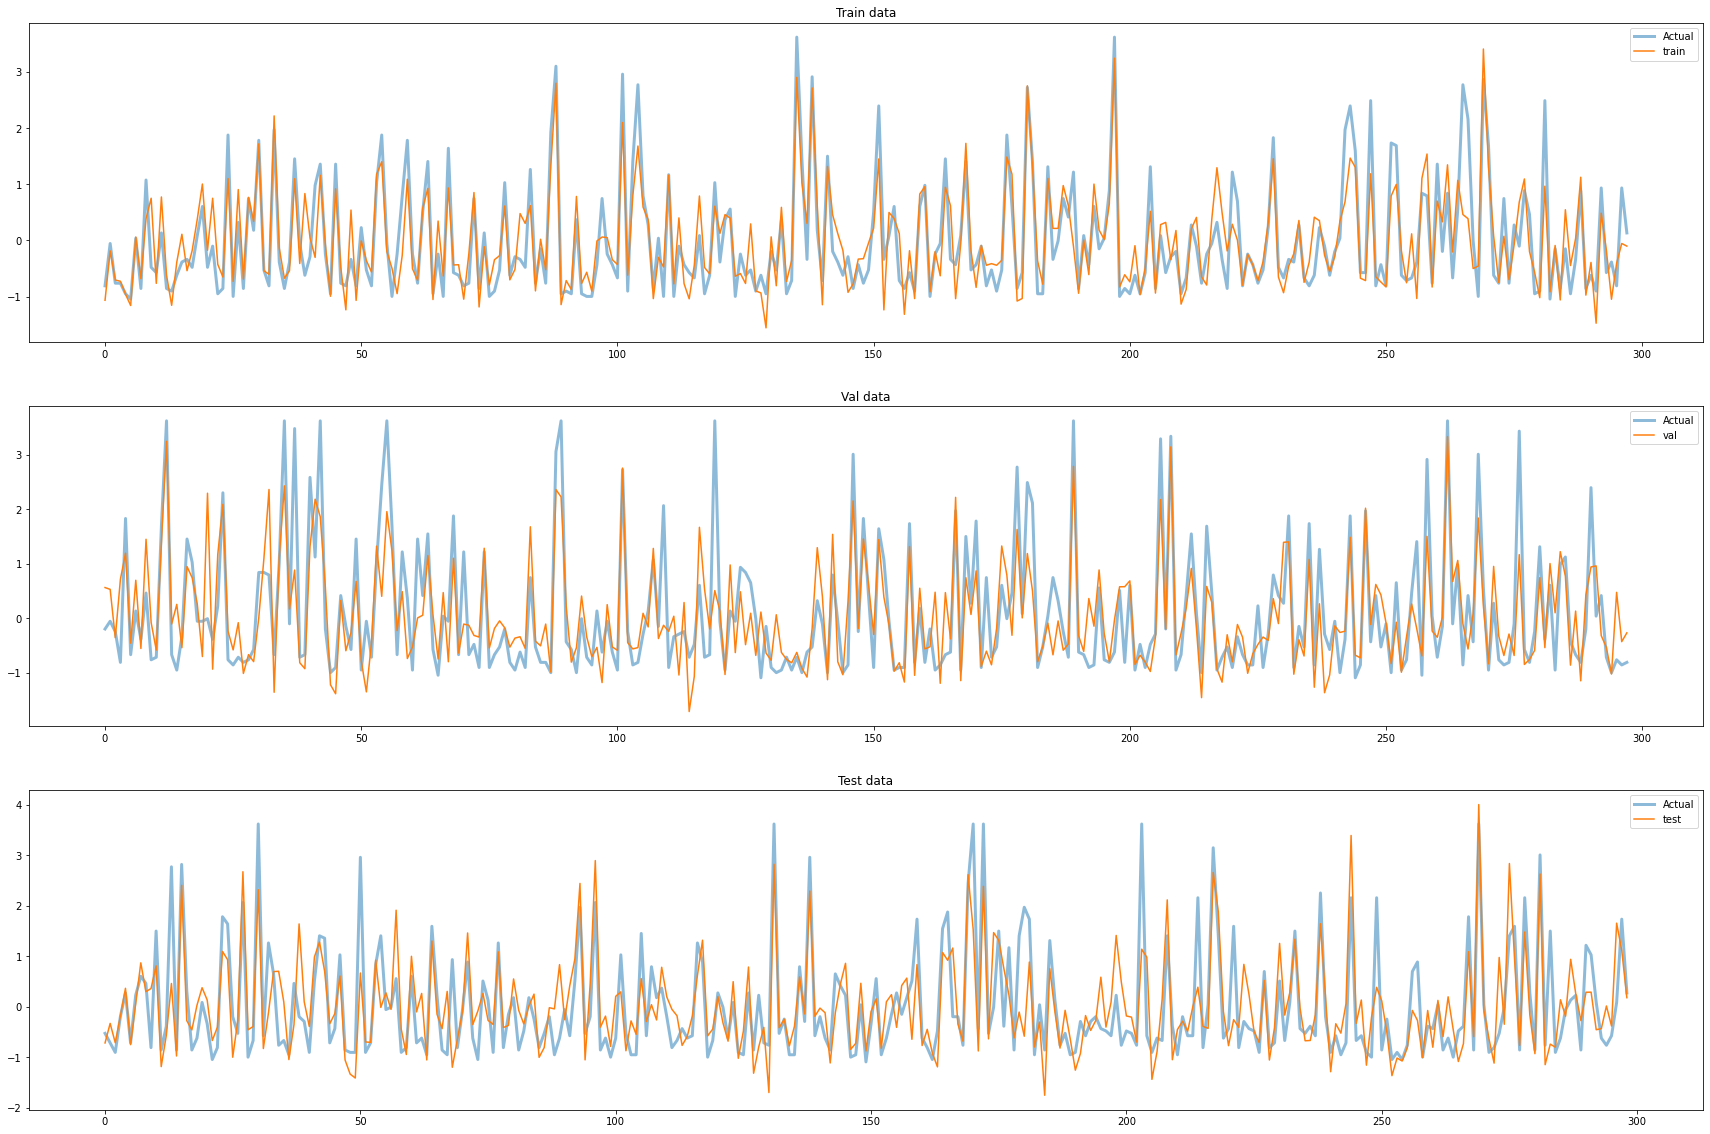

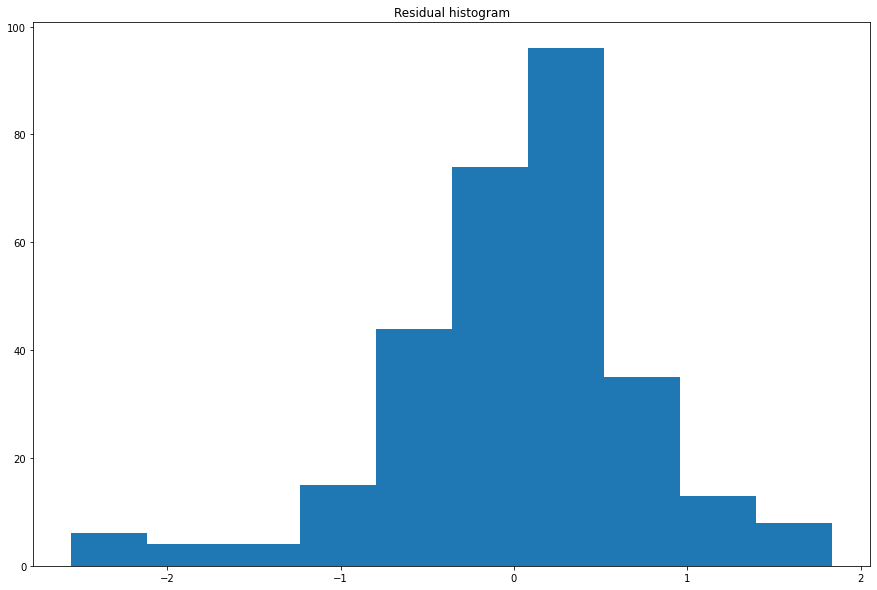

In [24]:
to_drop = [' PctKids2Par ', ' PctYoungKids2Par ',   \
           ' PctImmigRec8 ', ' NumImmig ', ' PctImmigRec5 ',   \
           ' RentLowQ ', ' RentHighQ ' ] 
x_temp = x_train
x_train_light = x_temp.drop(columns=to_drop)
x_temp = x_val
x_val_light = x_temp.drop(columns=to_drop)
x_temp = x_test
x_test_light = x_temp.drop(columns=to_drop)

linear_model = LinearRegression(fit_intercept=True).fit(x_train_light, y_train)
eval(linear_model, x_train_light, y_train, x_val_light, y_val, x_test_light, y_test)

---
---
# RIDGE MODEL
### Finding the best Lambda

8 250
16


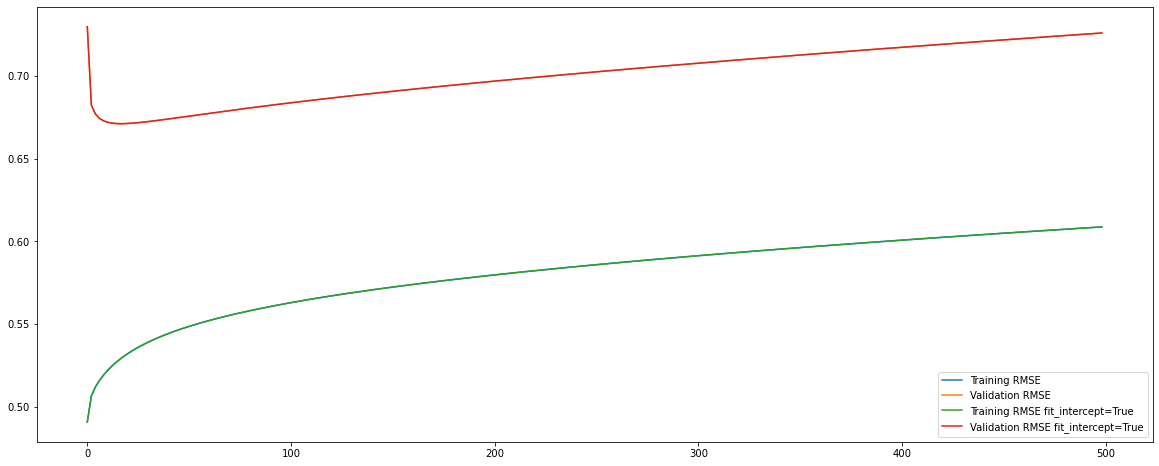

In [9]:
lambdas = np.arange(0, 500, 2)
# lambdas = np.arange(0, 5, 0.1)
rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    ridge_model = Ridge(fit_intercept=False, alpha=l).fit(X = x_train, y = y_train)
    rmse_train.append(rmse(y_train, ridge_model.predict(x_train)))
    rmse_validation.append(rmse(y_val, ridge_model.predict(x_val)))
    temp = ridge_model.coef_
    temp = [e for sl in temp for e in sl]
    coeffs.append(temp)

rmse_train_2 = []
rmse_validation_2 = []
coeffs_2 = []
for l in lambdas:
    ridge_model = Ridge(fit_intercept=True, alpha=l).fit(X = x_train, y = y_train)
    rmse_train_2.append(rmse(y_train, ridge_model.predict(x_train)))
    rmse_validation_2.append(rmse(y_val, ridge_model.predict(x_val)))
    temp = ridge_model.coef_
    temp = [e for sl in temp for e in sl]
    coeffs_2.append(temp)

index_best_rmse = np.argmin(rmse_validation+rmse_validation_2)
print(index_best_rmse, len(lambdas))
best_lambda = lambdas[index_best_rmse - len(lambdas)]
print(best_lambda)


fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.plot(lambdas, rmse_train_2, label='Training RMSE fit_intercept=True')
ax.plot(lambdas, rmse_validation_2, label='Validation RMSE fit_intercept=True')
ax.legend();


399 400
3.99


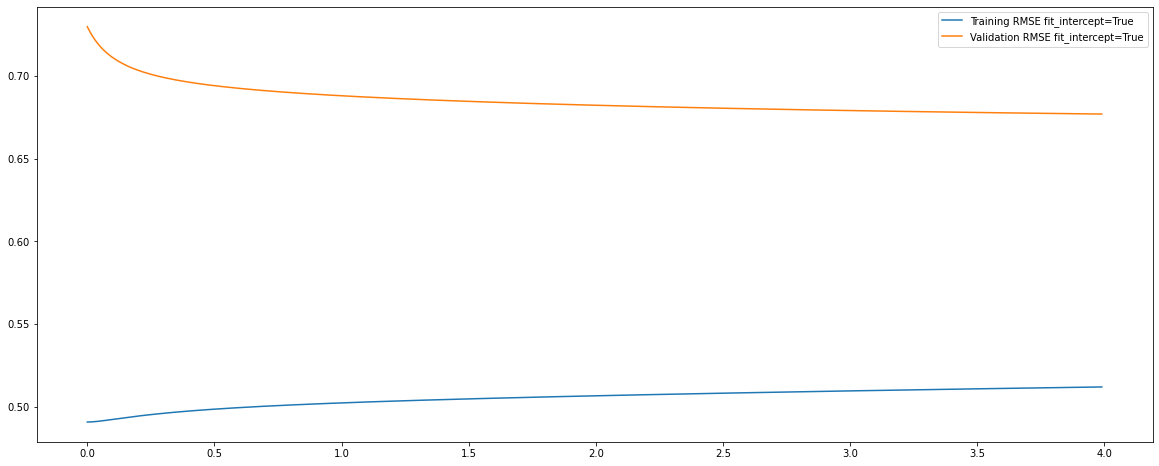

In [10]:
lambdas = np.arange(0, 4, 0.01)
rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    ridge_model = Ridge(fit_intercept=True, alpha=l).fit(X = x_train, y = y_train)
    rmse_train.append(rmse(y_train, ridge_model.predict(x_train)))
    rmse_validation.append(rmse(y_val, ridge_model.predict(x_val)))
    temp = ridge_model.coef_
    temp = [e for sl in temp for e in sl]
    coeffs.append(temp)

index_best_rmse = np.argmin(rmse_validation)
print(index_best_rmse, len(lambdas))
best_lambda = lambdas[index_best_rmse]
print(best_lambda)


fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE fit_intercept=True')
ax.plot(lambdas, rmse_validation, label='Validation RMSE fit_intercept=True')
ax.legend();

## Run the model with the best lambda found


RMSE train: 0.512032 val: 0.676921 test: 0.645897; 
R^2 train: 0.737823;


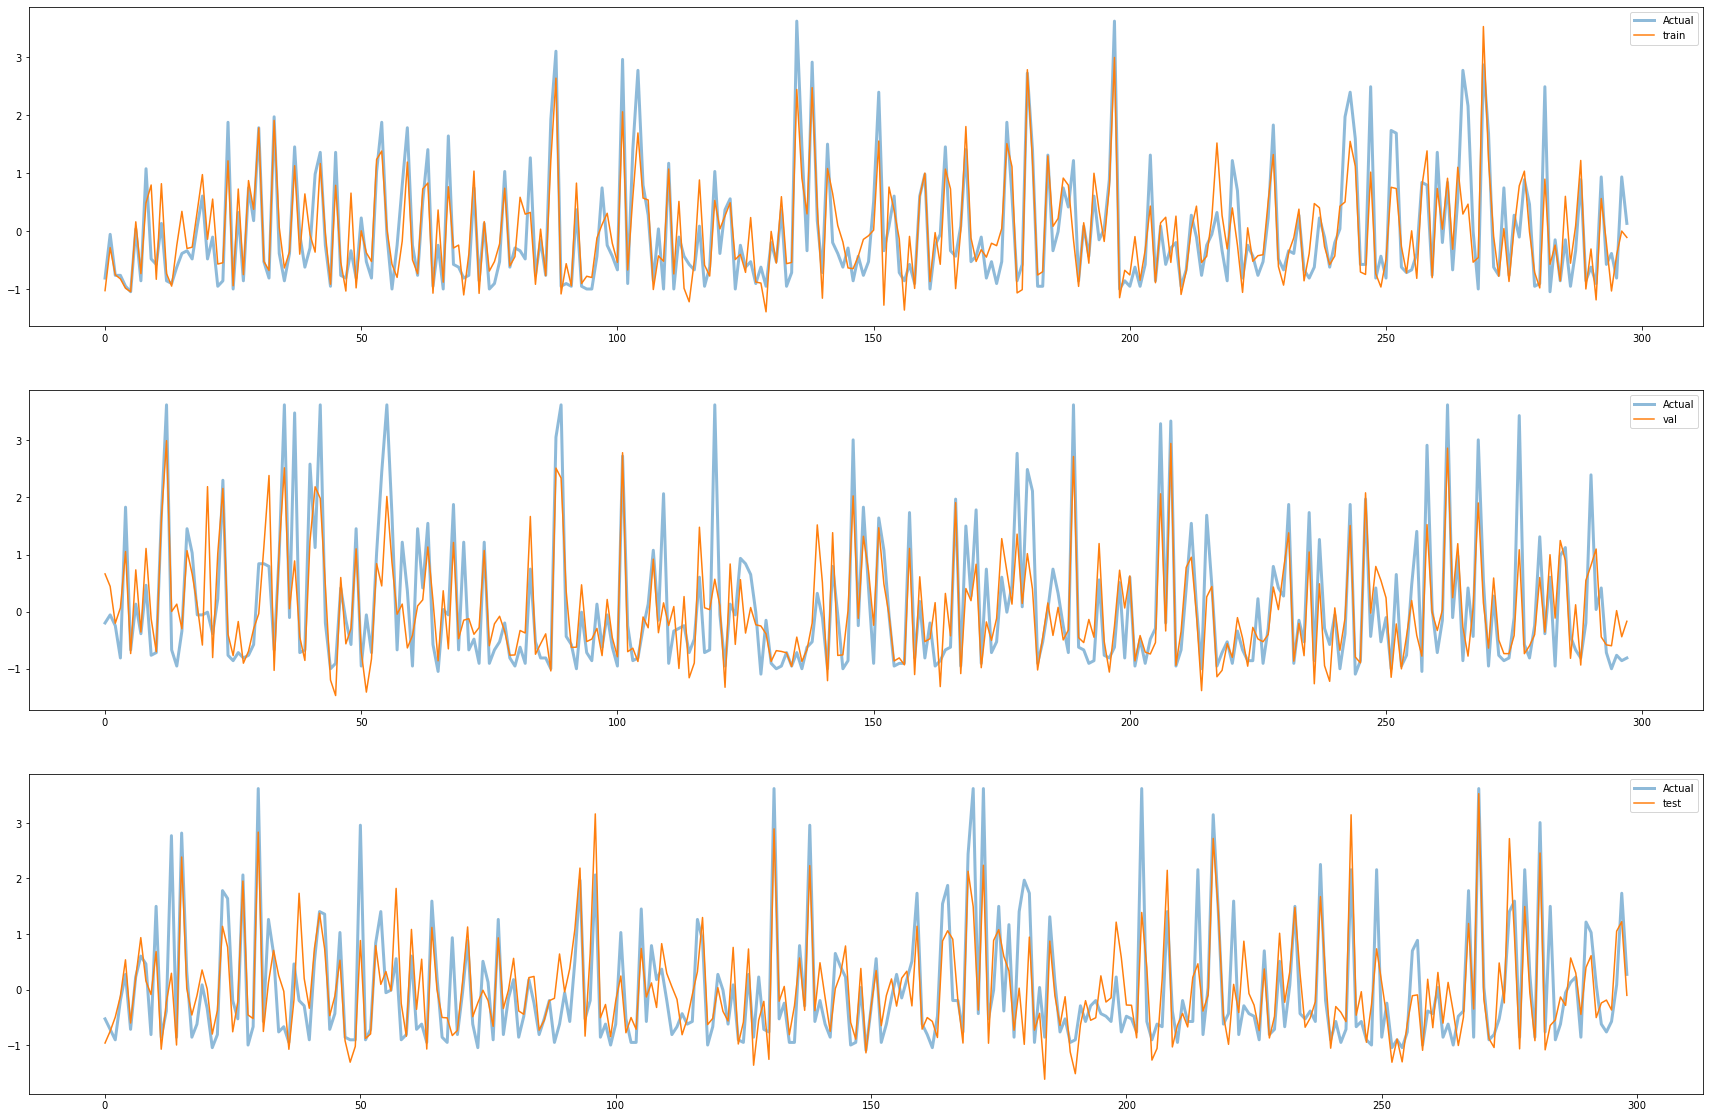

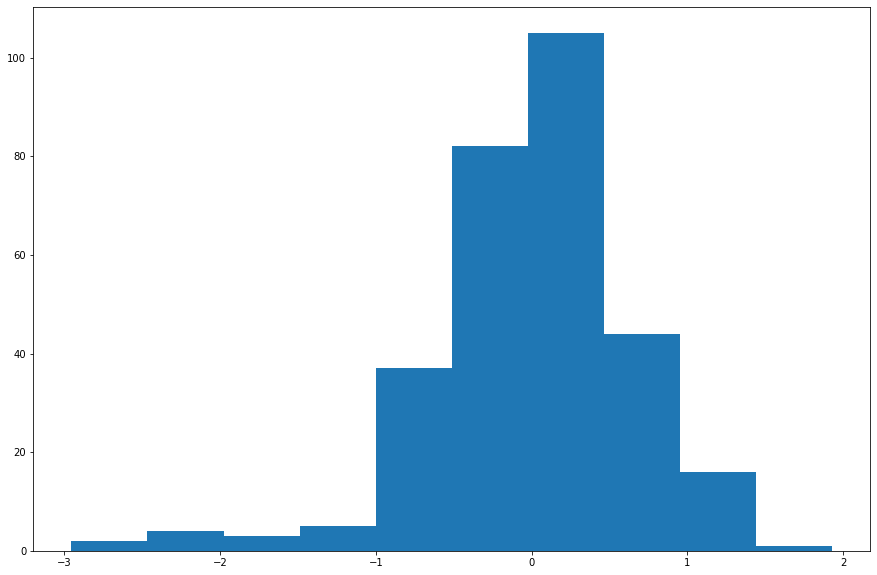

In [11]:
ridge_model = Ridge(fit_intercept=True, alpha=best_lambda).fit(X = x_train, y = y_train)
eval(ridge_model, x_train, y_train, x_val, y_val, x_test, y_test)

In [12]:
# fig = plt.figure(figsize=[15, 6])
# ax = fig.add_subplot(1, 1, 1)
# ax.hist(ridge_model.coef_);

# print(ridge_model.coef_)
# print(np.sum(ridge_model.coef_ <= 0.1) + np.sum(ridge_model.coef_ >= -0.1))

---
---
# LASSO MODEL


/tmp/ipykernel_36052/2640878477.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model = Lasso(fit_intercept=False, alpha=l).fit(X = x_train, y = y_train)
/home/rodo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/rodo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e+01, tolerance: 2.980e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_

0.0045000000000000005


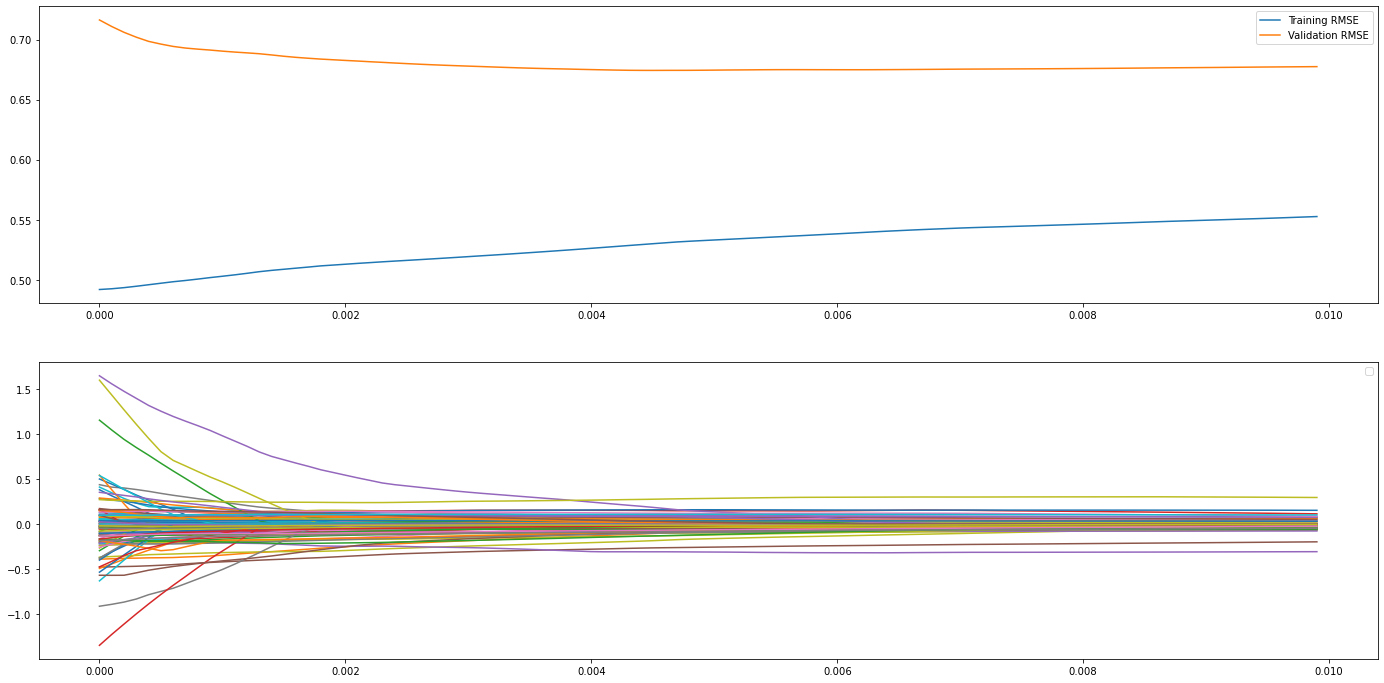

In [13]:
lambdas = np.arange(0.0, 100, 1)
lambdas = np.arange(0.0, 0.01, 0.0001)

rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    lasso_model = Lasso(fit_intercept=False, alpha=l).fit(X = x_train, y = y_train)
    rmse_train.append(rmse(y_train, lasso_model.predict(x_train)))
    rmse_validation.append(rmse(y_val, lasso_model.predict(x_val)))
    temp = lasso_model.coef_
    # temp = [e for sl in temp for e in sl]
    coeffs.append(temp)

best_lambda = lambdas[np.argmin(rmse_validation)]
print(best_lambda)


fig = plt.figure(figsize=[24, 12])
ax = fig.add_subplot(2, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.legend();

ax = fig.add_subplot(2, 1, 2)
ax.plot(lambdas, coeffs);
ax.legend();

In [14]:
lasso_model = Lasso(fit_intercept=False, alpha=best_lambda).fit(x_train, y_train)

train_result = lasso_model.predict(x_train)
val_result = lasso_model.predict(x_val)
test_result = lasso_model.predict(x_test)


RMSE train: 0.530091 val: 0.674393 test: 0.617509; 
R^2 train: 0.719004;


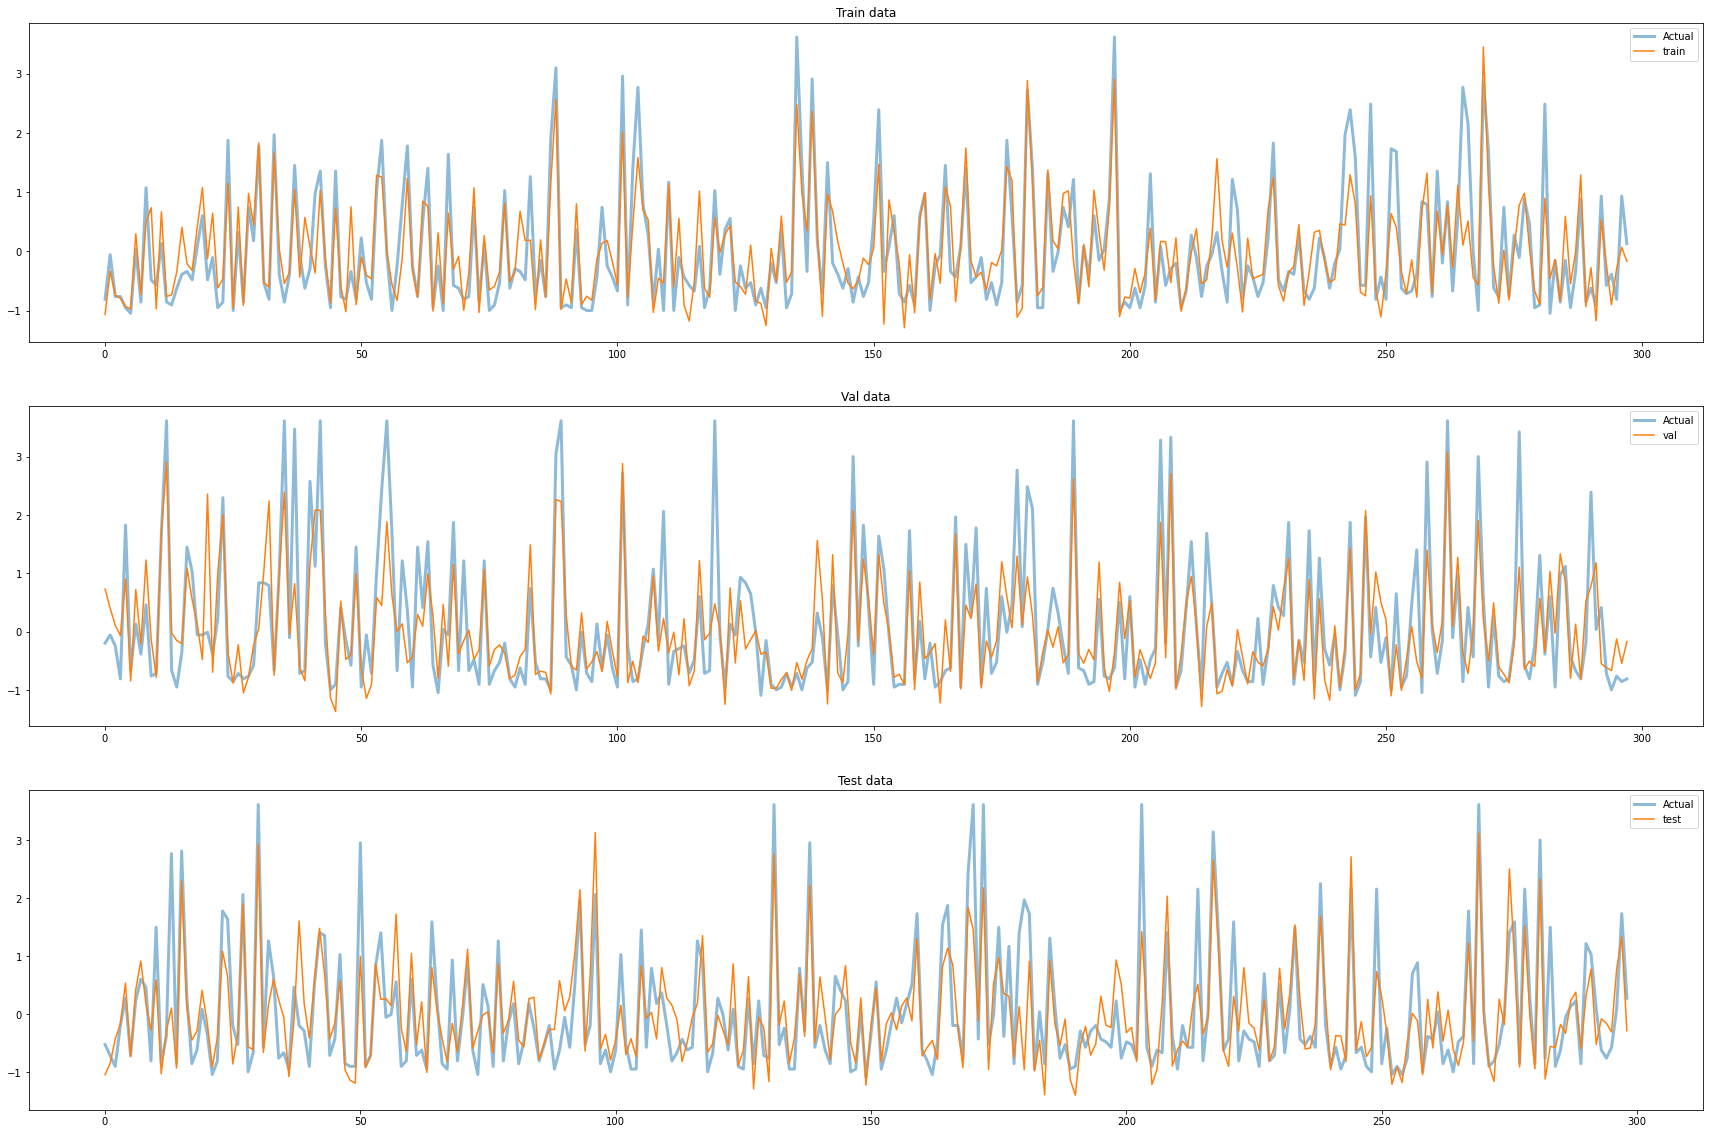

In [19]:
eval(lasso_model, x_train, y_train, x_val, y_val, x_test, y_test, False)

## Observe Lasso model's params

[ 0.         -0.10127856  0.04224864 -0.04666855 -0.         -0.26102725
 -0.00805725  0.02038139  0.04182829  0.02788489  0.          0.06505494
  0.         -0.04982974  0.0072626  -0.09075608  0.08915636  0.01353965
 -0.09785418  0.          0.          0.          0.         -0.02734928
  0.09633379  0.00183857  0.05435625 -0.         -0.18130948 -0.
  0.          0.01092192 -0.07547995  0.15321616 -0.08337847 -0.
 -0.          0.         -0.00246496  0.         -0.01102728 -0.
  0.         -0.         -0.30465789 -0.03598783 -0.          0.07194639
 -0.12924535  0.0524001   0.16165852 -0.02716374 -0.0587695  -0.03966628
 -0.          0.08113976 -0.         -0.          0.          0.
 -0.          0.00049415  0.03504586  0.          0.1886139  -0.08660161
  0.         -0.09849414  0.27889327  0.          0.          0.05633371
 -0.0456864  -0.          0.08840733 -0.04662812  0.         -0.
  0.04164246 -0.         -0.         -0.07400489 -0.12818461  0.
  0.09253914  0.          

(array([ 2.,  0.,  1., 11., 13., 57., 10.,  4.,  1.,  1.]),
 array([-0.30465789, -0.24630277, -0.18794766, -0.12959254, -0.07123743,
        -0.01288231,  0.04547281,  0.10382792,  0.16218304,  0.22053815,
         0.27889327]),
 <BarContainer object of 10 artists>)

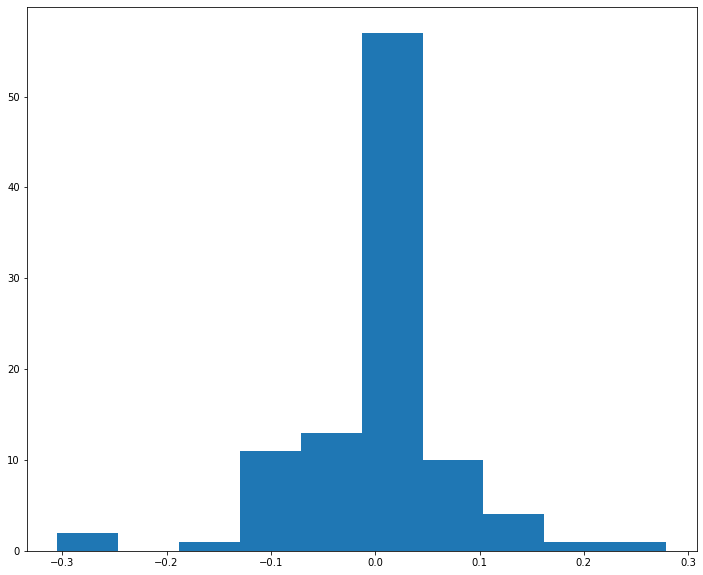

In [20]:
print(lasso_model.coef_)
print(np.sum(lasso_model.coef_ == 0), len(lasso_model.coef_))

fig = plt.figure(figsize=[12, 10])
ax = fig.add_subplot(1, 1, 1)
ax.hist(lasso_model.coef_)

Text(0.5, 1.0, "Model's coeefficients")

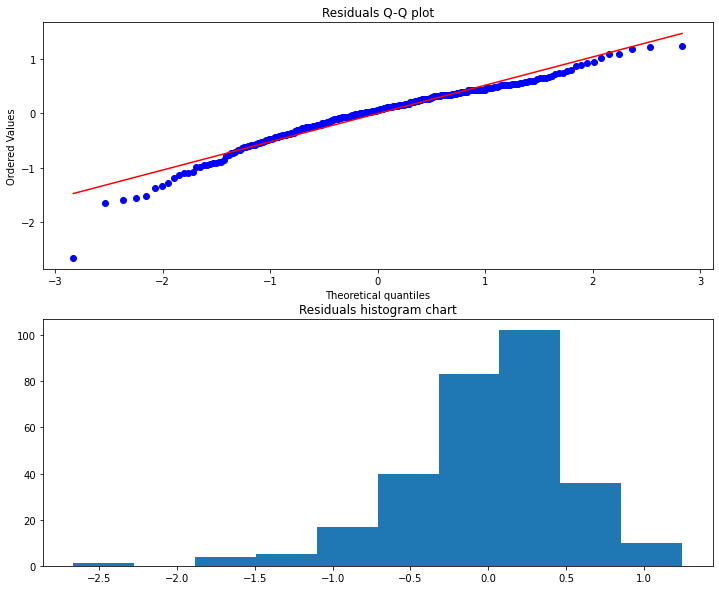

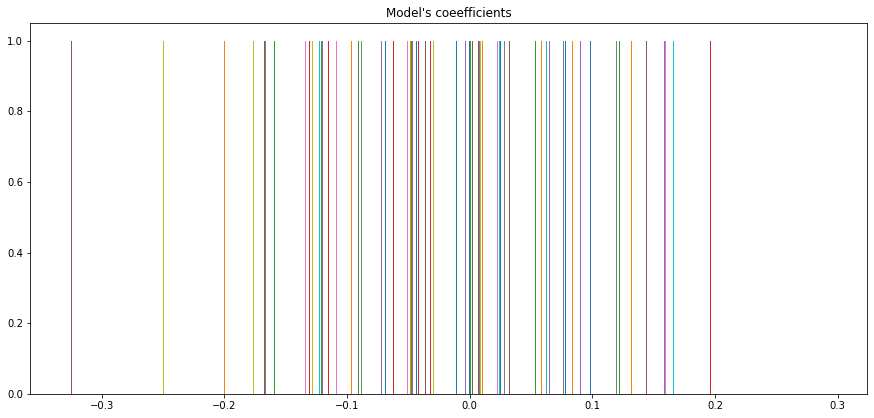

In [23]:

fig = plt.figure(figsize=[12, 10])
residuals = train_result - y_train.iloc[:,0]

ax = fig.add_subplot(2, 1, 1)
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Residuals Q-Q plot")

ax = fig.add_subplot(2, 1, 2)
ax.hist(residuals)
ax.set_title("Residuals histogram chart")

fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(2, 1, 2)
ax.hist(ridge_model.coef_)
ax.set_title("Model's coeefficients")